In [24]:
# Leitura do arquivo vindo do squad 2

import pandas as pd
import requests

def leitura():
    csv = requests.get("http://192.168.43.137:8250/getiris").content
    
    f = open('data.csv', 'wb')
    f.write(csv)
    f.close()
    df = pd.read_csv('data.csv')
    
    return df

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8250/ (Press CTRL+C to quit)
192.168.43.207 - - [24/Jan/2020 22:29:15] "POST /scatter HTTP/1.1" 400 -


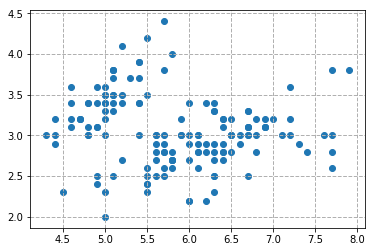

192.168.43.207 - - [24/Jan/2020 22:29:50] "POST /scatter HTTP/1.1" 200 -


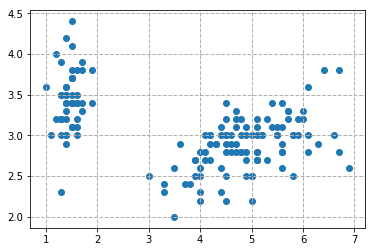

192.168.43.207 - - [24/Jan/2020 22:30:10] "POST /scatter HTTP/1.1" 200 -


In [29]:
#Criar endpoint de post que retorna o gráfico de dispersão e tem como input um json com as coordenadas a serem 
#plotadas. Por exemplo: {“coords”: [“sepal.length”, “petal.length”]

from flask import Flask, request, current_app, jsonify
import matplotlib.pyplot as plt
import pandas as pd
import requests


app = Flask(__name__)

@app.route("/scatter", methods=['POST'])

def scatter():
    df = leitura()
    parametros = request.json 
    lista = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
    
    if parametros["1"] in lista and parametros["2"] in lista:
     
      
        plt.scatter(df[parametros["1"]] , df[parametros["2"]] )
        plt.grid( linewidth= 1, linestyle="--")
        plt.show()
        return "grafico"  ,200
    
    else:
        return "cago", 400
    
app.run(host="0.0.0.0" , port=8250 )

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://0.0.0.0:8250/ (Press CTRL+C to quit)


Leitura executada com sucesso!


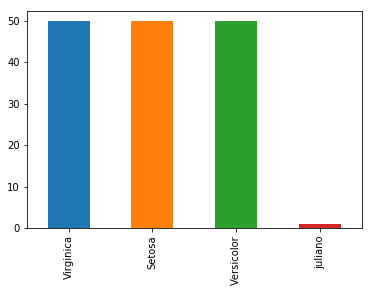

192.168.43.207 - - [24/Jan/2020 22:31:10] "POST /hist HTTP/1.1" 200 -


In [ ]:
#- Criar endpoint de get que retorna o histograma

from flask import Flask, request, current_app, jsonify
import matplotlib.pyplot as plt



app = Flask(__name__)

@app.route("/hist", methods=['POST'])

def hist():
    df = leitura()
    print("Leitura executada com sucesso!")
    
    df.variety.value_counts().plot(kind='bar')
    
    plt.show()
    
    return "grafico"  ,200

app.run(host="0.0.0.0" , port=8250 )